In [1]:
import os
import time as tm
import getpass
print(f'Last run on {tm.strftime("%Y-%m-%d, %A, %H:%M:%S")}')
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import folium
import fiona
print(fiona.__version__)
print(gpd.__version__)

Last run on 2025-02-07, Friday, 00:30:50
1.9.6
0.14.2


In [2]:
# hide actual path from computer
input_folder = '{0}'.format(getpass.getpass('type input_folder here:'))

type input_folder here:········


In [3]:
print(os.listdir(input_folder))

['tl_2024_42_tabblock20.prj', 'tl_2024_42_tabblock20.shp.ea.iso.xml', 'tl_2024_42_tabblock20.shp', 'tl_2024_42_tabblock20.cpg', 'tl_2024_42_tabblock20.shx', 'tl_2024_42_tabblock20.shp.iso.xml', 'tl_2024_42_tabblock20.dbf']


In [6]:
print(tm.strftime("%H:%M:%S"))
dbf_blk_42=gpd.read_file(input_folder +'/tl_2024_42_tabblock20.dbf')
print(tm.strftime("%H:%M:%S"))

00:36:45
00:38:14


In [7]:
type(dbf_blk_42)

geopandas.geodataframe.GeoDataFrame

In [8]:
dbf_blk_42.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 336985 entries, 0 to 336984
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   STATEFP20   336985 non-null  object  
 1   COUNTYFP20  336985 non-null  object  
 2   TRACTCE20   336985 non-null  object  
 3   BLOCKCE20   336985 non-null  object  
 4   GEOID20     336985 non-null  object  
 5   GEOIDFQ20   336985 non-null  object  
 6   NAME20      336985 non-null  object  
 7   MTFCC20     336985 non-null  object  
 8   UR20        336985 non-null  object  
 9   UACE20      197375 non-null  object  
 10  FUNCSTAT20  336985 non-null  object  
 11  ALAND20     336985 non-null  int64   
 12  AWATER20    336985 non-null  int64   
 13  INTPTLAT20  336985 non-null  object  
 14  INTPTLON20  336985 non-null  object  
 15  HOUSING20   336985 non-null  int64   
 16  POP20       336985 non-null  int64   
 17  geometry    336985 non-null  geometry
dtypes: geometry(1), 

In [9]:
dbf_blk_42.COUNTYFP20.value_counts()

COUNTYFP20
003    24787
101    17554
091    12463
071    12109
011    10644
       ...  
093     1063
057      797
113      720
023      621
053      564
Name: count, Length: 67, dtype: int64

In [11]:
dbf_blk_42_133=dbf_blk_42.loc[dbf_blk_42.COUNTYFP20 == '133'] # york

In [12]:
dbf_blk_42_133.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 10304 entries, 10 to 132659
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP20   10304 non-null  object  
 1   COUNTYFP20  10304 non-null  object  
 2   TRACTCE20   10304 non-null  object  
 3   BLOCKCE20   10304 non-null  object  
 4   GEOID20     10304 non-null  object  
 5   GEOIDFQ20   10304 non-null  object  
 6   NAME20      10304 non-null  object  
 7   MTFCC20     10304 non-null  object  
 8   UR20        10304 non-null  object  
 9   UACE20      6672 non-null   object  
 10  FUNCSTAT20  10304 non-null  object  
 11  ALAND20     10304 non-null  int64   
 12  AWATER20    10304 non-null  int64   
 13  INTPTLAT20  10304 non-null  object  
 14  INTPTLON20  10304 non-null  object  
 15  HOUSING20   10304 non-null  int64   
 16  POP20       10304 non-null  int64   
 17  geometry    10304 non-null  geometry
dtypes: geometry(1), int64(4), object(13)
memo

In [14]:
# split urban and rural
dbf_blk_42_133_u = dbf_blk_42_133.loc[dbf_blk_42_133.UR20 == 'U']
dbf_blk_42_133_r = dbf_blk_42_133.loc[dbf_blk_42_133.UR20 == 'R']

In [20]:
dbf_blk_42_133.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOIDFQ20,NAME20,MTFCC20,UR20,UACE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
10,42,133,022401,2000,421330224012000,1000000US421330224012000,Block2000,G5040,R,None,S,2162950,0,+39.8011901,-076.8830023,10,19,"POLYGON ((-76.89763 39.79385, -76.89760 39.793..."
11,42,133,022200,4027,421330222004027,1000000US421330222004027,Block4027,G5040,U,36784,S,9387,0,+39.8097627,-076.9816443,6,15,"POLYGON ((-76.98229 39.81010, -76.98203 39.810..."
12,42,133,022100,4024,421330221004024,1000000US421330221004024,Block4024,G5040,U,36784,S,6050,0,+39.8080272,-076.9765008,9,19,"POLYGON ((-76.97692 39.80810, -76.97691 39.808..."
13,42,133,022300,4032,421330223004032,1000000US421330223004032,Block4032,G5040,U,36784,S,6060,0,+39.8070039,-076.9937764,8,12,"POLYGON ((-76.99446 39.80712, -76.99385 39.807..."
14,42,133,022300,4035,421330223004035,1000000US421330223004035,Block4035,G5040,U,36784,S,54753,0,+39.8058372,-076.9972972,40,86,"POLYGON ((-76.99898 39.80735, -76.99878 39.807..."


<Axes: >

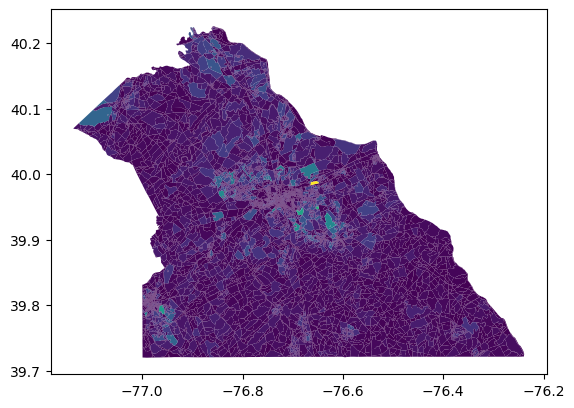

In [22]:
# plot the entire York county
dbf_blk_42_133.plot(column = 'POP20')

<Axes: >

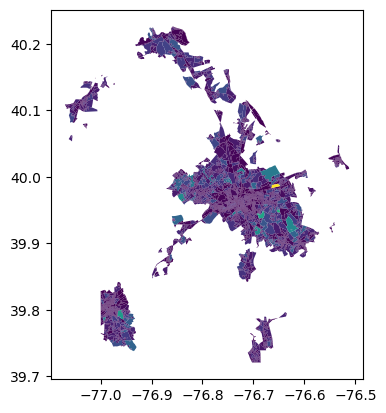

In [18]:
# urban
dbf_blk_42_133_u.plot(column = 'POP20')

<Axes: >

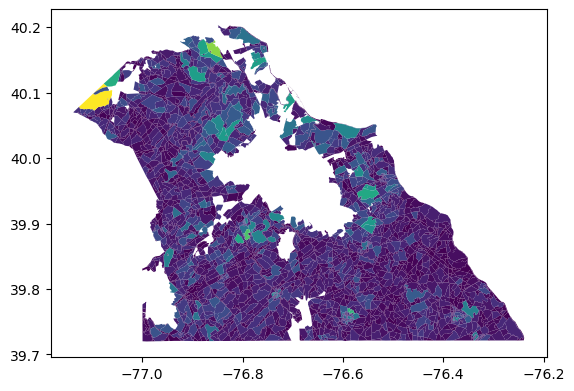

In [19]:
# rural
dbf_blk_42_133_r.plot(column = 'POP20')

In [27]:
dbf_blk_42_133_u.explore(
    column = 'POP20',
    tooltip = ['BLOCKCE20','POP20','HOUSING20'],
    popup = ['POP20','HOUSING20']).save(os.getcwd() + r'/sample_interactive.html')